# Sample notebook execution in RapidMiner
Any Jupyter Notebook can just be executed inside RapidMiner with the same Python environment. No changes to the notebook are necessary. Also there are several options to enhance the experience:

- Providing a function returning a Pandas DataFrame: this directly makes the data usable after calling a notebook from within RapidMiner.
- Adding a meta-data dictionary to a data frame that should be returned in order to provide additional information to colleagues about the data. RapidMiner specific roles like: 'label', 'prediction', but also self-defined ones can be used.
- Adding jupyter notebook tags in order to allow filtering which cells should be loaded by the RapidMiner user.
- Using the RapidMiner Python library to store data directly inside a RapidMiner repository.
- Using the RapidMiner Python library to execute RapidMiner processes.

## Demo process summary:
In this notebook the boston housing data set is loaded and examined. Afterwards a random forest regressor is trained on a subset and applied on a test data set. Finally a new pandas data frame is created storing the test data, the predicted values, true label values and additional meta-data. This data frame provided through a function that RapidMiner awaits and thus directly available for a RapidMiner user to use as an ExampleSet.

The demo process contains the tag 'prototyping' which can be used inside a RapidMiner process to filter out these cells to only exclude no prototype cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
# Loading example data
boston = datasets.load_boston()
X = boston.data
y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

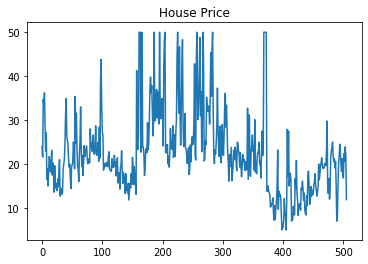

In [4]:
# Quick data check
print(boston.DESCR)
print("Label distribution:")
plt.title("House Price")
plt.plot(y);

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
estimator = RandomForestRegressor(n_estimators=100)

In [6]:
estimator.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [7]:
prediction = estimator.predict(X_test)

In [39]:
# Provide results to RapidMiner
def rm_main():
    # Create data frame with data the model was applied to
    results = pd.DataFrame(
        data=X_test,
        columns=boston.feature_names)
    # Add predictions to the data set
    results['Prediction'] = prediction
    # Add the true house prices
    results['HousePrice'] = y_test
    # And provide meta data information
    meta_data = dict(Prediction = ('numerical', 'prediction'),
                     HousePrice = ('numerical', 'label'))
    results.rm_metadata = meta_data
    
    return results